In [4]:
import control as ct
import numpy as np
from matplotlib import pyplot as plt

In [5]:
A = np.array([[-11, -10],[1,0]])
B = np.array([[1],[0]])
C = np.array([[0,5]])
D = 0
ma = ct.ss(A,B,C,D)

In [6]:
Aa = np.block([[A, np.zeros((2,1))],[-C, np.zeros((1,1))]])
Ba = np.block([[B],[0]])
Ca = np.block([[C,0]])
print(Aa)
print(Ba)
print(Ca)


[[-11. -10.   0.]
 [  1.   0.   0.]
 [  0.  -5.   0.]]
[[1]
 [0]
 [0]]
[[0 5 0]]


In [7]:
polos = [-3+3j,-3-3j,-9]
Ka = ct.acker(Aa,Ba,polos)
print(Ka)

[[  4.   62.  -32.4]]


In [8]:
Amf = Aa-Ba@Ka
Bmf = np.array([[0,1],[0,0],[1,0]])
Cmf = np.block([[Ca],[-Ka]])
Dmf = np.zeros((2,2))
mf = ct.ss(Amf,Bmf,Cmf,Dmf)
print(mf)


<LinearIOSystem>: sys[4]
Inputs (2): ['u[0]', 'u[1]']
Outputs (2): ['y[0]', 'y[1]']
States (3): ['x[0]', 'x[1]', 'x[2]']

A = [[-15.  -72.   32.4]
     [  1.    0.    0. ]
     [  0.   -5.    0. ]]

B = [[0. 1.]
     [0. 0.]
     [1. 0.]]

C = [[  0.    5.    0. ]
     [ -4.  -62.   32.4]]

D = [[0. 0.]
     [0. 0.]]



In [27]:
N = 500
t = np.linspace(0,6,num=N)
deg = lambda t: t>=0
u = np.zeros((N,2))
u[:,0] = deg(t)
u[:,1] = 0.5*deg(t-3)

In [9]:
Tab = ct.damp(mf)

_____Eigenvalue______ Damping___ Frequency_
        -9                     1          9
        -3        +3j     0.7071      4.243
        -3        -3j     0.7071      4.243


In [10]:
ct.dcgain(mf)

array([[ 1.,  0.],
       [ 2., -1.]])

In [30]:
t,y = ct.forced_response(mf,t,u.T)
y.shape

(2, 500)

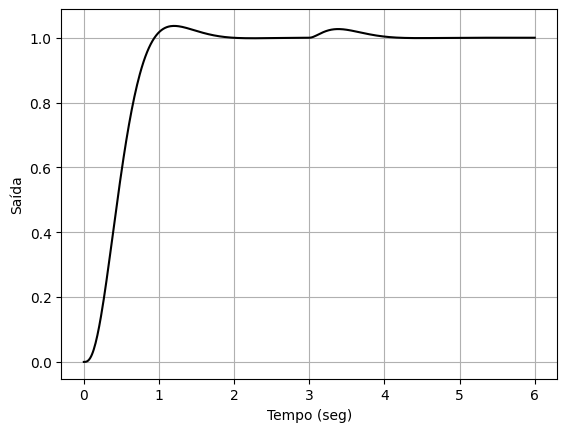

In [31]:
plt.plot(t,y[0,:],'k')
plt.xlabel('Tempo (seg)')
plt.ylabel('Saída')
plt.grid()
plt.show()


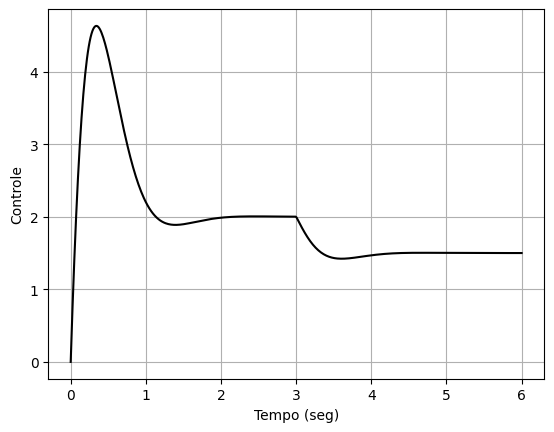

In [33]:
plt.plot(t,y[1,:],'k')
plt.xlabel('Tempo (seg)')
plt.ylabel('Controle')
plt.grid()
plt.show()
